# Домашние задания по математической статистике

### Гаварина Светлана, СКБ-171
---

# Домашнее задание 2.
# Основные понятия математической статистики


## 1. Распределение Пуассона

---
## 1.1 Моделирование выбранных случайных величин

In [3]:
import random
import numpy as np
import math

# функция генерации выборки
def rand_Pois(lamb, n):
    nums = []
    for i in range(n):
        p = math.exp(-lamb)
        sp = 0
        sp += p
        u = random.uniform(0,1)
        j = 0
        while u > sp:
            j += 1         # p_j
            p *= lamb / j  # p_j / p_j-1 = lamb / j
            sp += p
        nums.append(j)
    return nums

#Функция вероятности (закон распределения)
def f_Pois(x, lamb):
    return math.exp(-lamb) * lamb ** x / math.factorial(x)

#Функция распределения
def F_Pois(x, lamb):
    s = 0
    for i in range(x - 1):
        s += math.exp(-lamb) * lamb ** i / math.factorial(i)
    return s

#### Пусть $\lambda = 3$.

In [4]:
lamb = 3

pois5 = [] # Выборки объемом 5
for i in range(5):
    pois5.append(rand_Pois(lamb, 5))
    
pois10 = [] # Выборки объемом 10
for i in range(5):
    pois10.append(rand_Pois(lamb, 10))
    
pois100 = [] # Выборки объемом 100
for i in range(5):
    pois100.append(rand_Pois(lamb, 100))
    
pois1000 = [] # Выборки объемом 1000
for i in range(5):
    pois1000.append(rand_Pois(lamb, 1000))

pois105 = [] # Выборки объемом 10 ** 5
for i in range(5):
    pois105.append(rand_Pois(lamb, 10 ** 5))
    
print('Выборки объемом 5:', *pois5, sep='\n')
print('Выборки объемом 10:', *pois10, sep='\n')

Выборки объемом 5:
[7, 3, 1, 8, 5]
[1, 2, 1, 2, 5]
[5, 3, 4, 5, 2]
[3, 2, 0, 4, 5]
[5, 2, 3, 2, 2]
Выборки объемом 10:
[3, 2, 3, 3, 2, 0, 5, 4, 5, 1]
[5, 8, 4, 6, 10, 4, 0, 7, 2, 2]
[1, 6, 2, 6, 1, 5, 6, 5, 5, 3]
[4, 5, 5, 4, 5, 4, 8, 2, 1, 4]
[2, 2, 2, 4, 1, 2, 4, 5, 1, 2]


---
## 1.2. Построение эмпирической функции распределения

<a href="https://www.codecogs.com/eqnedit.php?latex=\dpi{300}&space;\bg_white&space;\tiny&space;\stackrel{\wedge}{F_n}(x)&space;=&space;\dfrac{\sum\limits_{i=1}^{n}I(x_i&space;<&space;x)}{n}" target="_blank"><img src="https://latex.codecogs.com/png.latex?\dpi{300}&space;\bg_white&space;\tiny&space;\stackrel{\wedge}{F_n}(x)&space;=&space;\dfrac{\sum\limits_{i=1}^{n}I(x_i&space;<&space;x)}{n}" title="\tiny \stackrel{\wedge}{F_n}(x) = \dfrac{\sum\limits_{i=1}^{n}I(x_i < x)}{n}" /></a>

Функции для дискретной и для непрерывной величины будут различаться лишь тем, что в первом случае x будут только целыми.

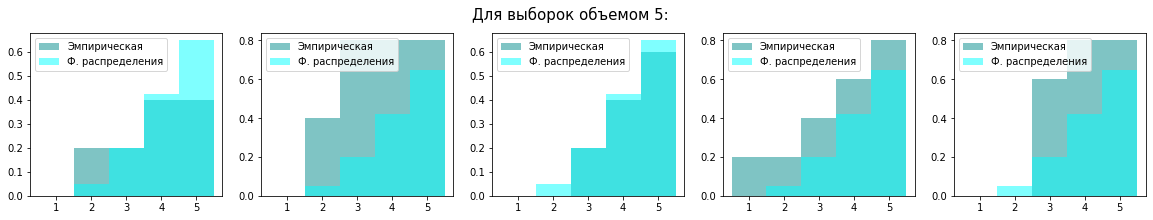

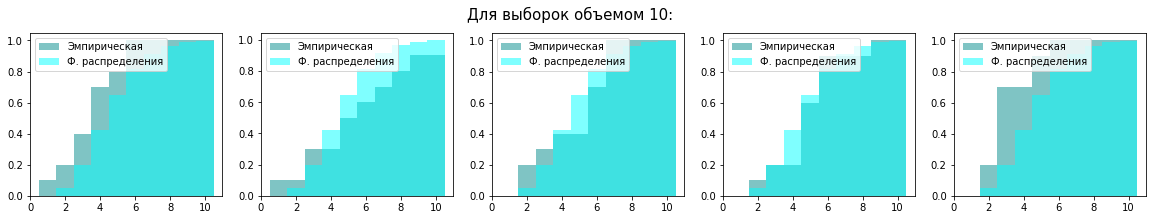

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

# nums - выборка
# is_discr - флаг дискретного/непрерывного распределения

def emp(nums, is_discr):
    nums_s = sorted(nums)
    n = len(nums)
    xx = []
    yy = []
    if is_discr:
        i_range = range(1, n + 1)
    else:
        i_range = np.linspace(0, n / (n / 10), 110)
    temp_ind = 0
    s = 0
#     for i in i_range: -- старая версия. Работает на несколько порядков медленнее
#         xx.append(i)
#         yy.append(sum(1 for x in nums if x < i) / n)
    for i in i_range:
        xx.append(i)
        while temp_ind < len(nums_s) and nums_s[temp_ind] < i:
            s += 1
            temp_ind += 1
#             print(temp_ind, i)
        yy.append(s / n)
    
    return xx, yy

# pois -- список выборок объемом n
def hists_pois(pois):
    plt.figure(figsize=(20, 3))
    plt.suptitle('Для выборок объемом ' + str(len(pois[1])) + ':', fontsize=15, y=1.)
    cnt = 151
    for p in pois:
        xx, yy = emp(p, True)
        y_f = list(map(lambda i: F_Pois(i, 3), xx))
        plt.subplot(cnt)
        plt.bar(xx, yy, alpha = 0.5, color = 'DarkCyan', align = 'center', width=1, label = 'Эмпирическая')
        plt.bar(xx, y_f, alpha = 0.5, color = 'Cyan', align = 'center', width=1, label = 'Ф. распределения')
        plt.legend(loc="upper left")
        cnt += 1

hists_pois(pois5)
hists_pois(pois10)

Таким образом, очевидно, что чем больше объем выборки, тем точнее приближение эмпирической функции к функции распределения. Для наглядности представим график для выборки объемом 100:

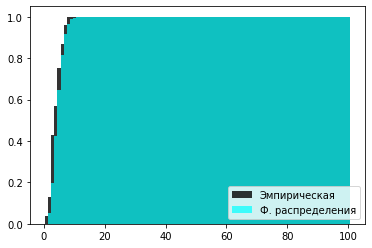

In [17]:
xx, yy = emp(pois100[0], True)
_, ax = plt.subplots()
y_f = list(map(lambda i: F_Pois(i, 3), xx))
ax.bar(xx, yy, alpha = 0.8, color = 'Black', align = 'center', width=1, label = 'Эмпирическая')
ax.bar(xx, y_f, alpha = 0.7, color = 'Cyan', align = 'center', width=1, label = 'Ф. распределения')
# ax.plot(xx, yy)
# ax.plot(xx, y_f)
ax.legend(loc="lower right")

#### Нахождение точной верхней границы разности каждой пары эмпирических функций распределения.

Берутся два набора x и y, по одному для каждой эмпирической функции для выборке в паре. Точки x, согласно алгоритму нахождения эмпирической функции распределения, для них совпадают. Для каждого x ищутся соответствующие y в каждом из наборов, берется модуль разности для них. Последним шагом ищется максимум этих модулей.

В случае, если рассматриваются выборки разных размеров, то наборы х и у для выборки меньшего объема будут короче, чем для выборки большего объема. В таком случае рассмотрение заканчивается на последнем у из меньшего набора. Иначе далее брался бы модуль разницы оставшихся у из большего набора и последнего у из меньшего, что не имеет смысла рассматривать.

In [120]:
import itertools
import tqdm

def high_of_diff(combs, is_diskr):
    ans = []
#     for comb in tqdm.tqdm(combs):
    for comb in combs:
        ## сomb1 -- более короткая выборка, comb2 -- более длинная
        if len(comb[0]) > len(comb[1]):
            comb1, comb2 = comb[1], comb[0]
        else:
            comb1, comb2 = comb[0], comb[1]
        x1, y1 = emp(comb1, is_diskr)
        x2, y2 = emp(comb2, is_diskr)
        yy = []
        for x in x1:
            ind = x1.index(x)
            yy.append(abs(y1[ind] - y2[ind]))
        ans.append(max(yy))
    return np.round(ans, 5)

##### 1. Для выборок объемом n = 5

In [121]:
combs5 = list(itertools.combinations(pois5, 2))
print(high_of_diff(combs5, True))

[0.6 0.2 0.4 0.4 0.6 0.4 0.4 0.2 0.4 0.2]


##### 2. Для выборок объемом n = 10

In [114]:
combs10 = list(itertools.combinations(pois10, 2))
print(high_of_diff(combs10, True))

[0.4 0.4 0.5 0.3 0.3 0.3 0.4 0.2 0.5 0.5]


##### 3. Для выборок объемом n = 100

In [24]:
combs100 = list(itertools.combinations(pois100, 2))
print(high_of_diff(combs100, True))

[0.04 0.06 0.07 0.13 0.06 0.07 0.13 0.08 0.15 0.07]


##### 4. Для выборок объемом n = 1000

In [31]:
combs1000 = list(itertools.combinations(pois1000, 2))
print(high_of_diff(combs1000, True))

[0.018 0.037 0.019 0.017 0.044 0.026 0.014 0.038 0.048 0.017]


##### 5. Для выборок объемом n = 10 ** 5

In [119]:
%%time
combs105 = list(itertools.combinations(pois105, 2))
print(high_of_diff(combs105, True))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [09:55<00:00, 59.58s/it]


[0.0026  0.00236 0.00216 0.00131 0.00496 0.00237 0.00224 0.00319 0.00272
 0.00251]
Wall time: 9min 55s


##### 6. Для комбинаций выборок n = 5 и n = 10 (без учета сочетаний выборок одинакового объема)

In [87]:
combs5_10 = list(itertools.product(pois5, pois10))
print(high_of_diff(combs5_10, True))

[0.4 0.1 0.1 0.2 0.5 0.4 0.5 0.5 0.6 0.2 0.3 0.1 0.2 0.2 0.5 0.1 0.3 0.4
 0.4 0.3 0.2 0.5 0.4 0.6 0.2]


##### 7. Для комбинаций выборок n = 5 и n = 100 (без учета сочетаний выборок одинакового объема)

In [88]:
combs5_100 = list(itertools.product(pois5, pois100))
print(high_of_diff(combs5_100, True))

[0.35 0.38 0.37 0.4  0.47 0.37 0.41 0.43 0.35 0.28 0.23 0.21 0.21 0.25
 0.32 0.16 0.18 0.16 0.16 0.16 0.23 0.21 0.23 0.2  0.22]


##### 8. Для комбинаций выборок n = 5 и n = 1000 (без учета сочетаний выборок одинакового объема)

In [89]:
combs5_1000 = list(itertools.product(pois5, pois1000))
print(high_of_diff(combs5_1000, True))

[0.418 0.4   0.44  0.426 0.414 0.37  0.388 0.351 0.389 0.374 0.243 0.236
 0.28  0.248 0.232 0.153 0.155 0.148 0.155 0.148 0.209 0.195 0.193 0.209
 0.192]


##### 9. Для комбинаций выборок n = 5 и n = 10 ** 5 (без учета сочетаний выборок одинакового объема)

In [90]:
combs5_105 = list(itertools.product(pois5, pois105))
print(high_of_diff(combs5_105, True))

[0.41422 0.41529 0.41488 0.41604 0.41515 0.37646 0.37469 0.37749 0.3743
 0.37681 0.24666 0.24926 0.2443  0.24741 0.24702 0.15041 0.15026 0.15081
 0.15099 0.14982 0.19942 0.19775 0.20019 0.20012 0.19839]


##### 10. Для комбинаций выборок n = 10 и n = 100 (без учета сочетаний выборок одинакового объема)

In [91]:
combs10_100 = list(itertools.product(pois10, pois100))
print(high_of_diff(combs10_100, True))

[0.13 0.09 0.15 0.1  0.12 0.27 0.31 0.31 0.33 0.4  0.35 0.38 0.37 0.4
 0.47 0.37 0.41 0.41 0.43 0.5  0.27 0.31 0.33 0.25 0.18]


##### 11. Для комбинаций выборок n = 10 и n = 1000 (без учета сочетаний выборок одинакового объема)

In [92]:
combs10_1000 = list(itertools.product(pois10, pois1000))
print(high_of_diff(combs10_1000, True))

[0.083 0.078 0.081 0.073 0.09  0.343 0.336 0.38  0.348 0.332 0.418 0.4
 0.44  0.426 0.414 0.443 0.436 0.48  0.448 0.432 0.27  0.288 0.251 0.289
 0.274]


##### 12. Для комбинаций выборок n = 10 и n = 10 ** 5 (без учета сочетаний выборок одинакового объема)

In [93]:
combs10_105 = list(itertools.product(pois10, pois105))
print(high_of_diff(combs10_105, True))

[0.08519 0.0838  0.0842  0.08436 0.08388 0.34666 0.34926 0.3443  0.34741
 0.34702 0.41422 0.41529 0.41488 0.41604 0.41515 0.44666 0.44926 0.4443
 0.44741 0.44702 0.27646 0.27469 0.27749 0.2743  0.27681]


##### 13. Для комбинаций выборок n = 100 и n = 1000 (без учета сочетаний выборок одинакового объема)

In [94]:
combs100_1000 = list(itertools.product(pois100, pois1000))
print(high_of_diff(combs100_1000, True))

[0.079 0.066 0.11  0.079 0.064 0.079 0.065 0.07  0.079 0.062 0.067 0.072
 0.079 0.077 0.06  0.036 0.038 0.05  0.042 0.041 0.09  0.108 0.071 0.109
 0.094]


##### 14. Для комбинаций выборок n = 100 и n = 10 ** 5 (без учета сочетаний выборок одинакового объема)

In [95]:
combs100_105 = list(itertools.product(pois100, pois105))
print(high_of_diff(combs100_105, True))

[0.07666 0.07926 0.0743  0.07741 0.07702 0.06942 0.06775 0.07019 0.07012
 0.06839 0.06481 0.0662  0.0658  0.06564 0.06612 0.03774 0.03835 0.03824
 0.03823 0.03873 0.09646 0.09469 0.09749 0.0943  0.09681]


##### 15. Для комбинаций выборок n = 1000 и n = 10 ** 5 (без учета сочетаний выборок одинакового объема)

In [96]:
combs1000_105 = list(itertools.product(pois1000, pois105))
print(high_of_diff(combs1000_105, True))

[0.00958 0.01125 0.00881 0.00888 0.01061 0.01422 0.01529 0.01488 0.01604
 0.01515 0.03334 0.03074 0.0357  0.03259 0.03298 0.01254 0.01431 0.01151
 0.0147  0.01219 0.01466 0.01726 0.0123  0.01541 0.01502]


---
## 1.3 Построение вариационного ряда выборки

In [55]:
var_list_5 = []
for i in pois5:
    var_list_5.append(sorted(i))
print('Вариационные ряды для выборок объема 5:', *var_list_5, sep='\n')
print()

var_list_10 = []
for i in pois10:
    var_list_10.append(sorted(i))
print('Вариационные ряды для выборок объема 10:', *var_list_10, sep='\n')

var_list_100 = []
for i in pois100:
    var_list_100.append(sorted(i))
    
var_list_1000 = []
for i in pois1000:
    var_list_1000.append(sorted(i))
    
var_list_105 = []
for i in pois105:
    var_list_105.append(sorted(i))

Вариационные ряды для выборок объема 5:
[0, 1, 2, 3, 4]
[0, 2, 2, 3, 3]
[2, 3, 3, 3, 5]
[2, 3, 3, 4, 8]
[1, 2, 3, 4, 4]

Вариационные ряды для выборок объема 10:
[1, 1, 1, 3, 4, 4, 4, 4, 5, 5]
[1, 1, 2, 2, 3, 4, 4, 6, 7, 10]
[0, 1, 2, 2, 2, 3, 4, 5, 5, 6]
[0, 1, 2, 2, 3, 4, 5, 6, 7, 8]
[0, 2, 2, 2, 3, 3, 3, 4, 4, 5]


#### Найти выборочную квантиль уровня 0.1, 0.5, 0.7

Из функции нахождения эмпирической функции распределения получаем список x и y. Если искомая квантиль находится в списке y, то необходимо найти соответствующую ей x. В противном случае находится промежуток, в котором находится квантиль, и найти среднее в нем.

В случае, если квантиль меньше самого малого из y, возвращается 0.

В случае, если квантиль больше самого большого из у, возвращается x, соответствующее максимальному у.

In [39]:
import scipy.stats.mstats as ssm
import pandas as pd

def find_kvant(kvant, emp_f):
    xx, yy = emp_f
    if kvant in yy:
        return xx[yy.index(kvant)]
    else:
        ind_y = 0 # индекс правого конца промежутка, в котором находится квантиль
        if kvant < min(yy):
            return 0
        elif kvant > max(yy):
            return xx[yy.index(max(yy))]
        else:
            while ind_y < len(yy) and yy[ind_y] < kvant:
                ind_y += 1
            if ind_y:
                return (xx[ind_y] + xx[ind_y - 1]) / 2
            else:
                return (xx[0] / 2)

    
kvs = [0.1, 0.5, 0.7] 

def print_quants(kvs, distr, is_diskr):
    print('Выборки объемом ', len(distr[1]), ':', sep='')
    my_quants = []
    sp_quants = []
    for kv in kvs:
        quants = []
        quants_tru = []
        for d in distr:
            quants.append(np.round(find_kvant(kv, emp(d, is_diskr)), 3))
            quants_tru.append(np.round(*ssm.mquantiles(d, kv), 3))
        my_quants.append(quants)
        sp_quants.append(quants_tru)
    data = np.array([['', my_quants[0], sp_quants[0]], ['', my_quants[1], sp_quants[1]], ['', my_quants[2], sp_quants[2]]])
    pd.options.display.expand_frame_repr = False
    print(pd.DataFrame(data, columns = ['', 'Представленная функция', 'Из пакета scipy'], index = [0.1, 0.5, 0.7]))

print_quants(kvs, pois5, True)
print()
print_quants(kvs, pois10, True)
print()
print_quants(kvs, pois100, True)
print()
print_quants(kvs, pois1000, True)
print()
print_quants(kvs, pois105, True)

Выборки объемом 5:
        Представленная функция                Из пакета scipy
0.1    [1.5, 1.5, 2.5, 0, 2.5]      [1.0, 1.0, 2.0, 0.0, 2.0]
0.5    [4, 2.5, 4.5, 3.5, 2.5]      [5.0, 2.0, 4.0, 3.0, 2.0]
0.7      [4, 2.5, 5, 4.5, 3.5]  [7.04, 2.12, 5.0, 4.04, 3.08]

Выборки объемом 10:
        Представленная функция                Из пакета scipy
0.1        [1, 1, 1.5, 2, 1.5]   [0.42, 0.84, 1.0, 1.42, 1.0]
0.5    [3.5, 5, 5.5, 4.5, 2.5]      [3.0, 4.5, 5.0, 4.0, 2.0]
0.7          [4, 7, 6, 5.5, 3]  [3.54, 6.54, 5.54, 5.0, 3.08]

Выборки объемом 100:
          Представленная функция             Из пакета scipy
0.1    [1.5, 1.5, 1.5, 1.5, 1.5]   [1.0, 1.0, 1.0, 1.0, 1.0]
0.5    [3.5, 3.5, 3.5, 3.5, 2.5]   [3.0, 3.0, 3.0, 3.0, 2.0]
0.7      [4.5, 4.5, 4.5, 4.5, 4]  [4.0, 4.0, 4.0, 4.0, 3.54]

Выборки объемом 1000:
          Представленная функция            Из пакета scipy
0.1    [1.5, 1.5, 1.5, 1.5, 1.5]  [1.0, 1.0, 1.0, 1.0, 1.0]
0.5    [3.5, 3.5, 3.5, 3.5, 3.5]  [3.0, 3.0, 3.0, 3.0, 

---
## 1.4 Построение полигона частот

In [40]:
def freq_polygons(var_list):
    n = len(var_list[1])
    plt.figure(figsize=(20, 3))
    plt.suptitle('Для выборок объемом ' + str(n) + ':', fontsize=15, y=1.)
    cnt = 151
    for v in var_list:
        yy = []
        x_1 = range(max(v) + 1)
        y_1 = list(map(lambda x: f_Pois(x, 3), x_1))
       
        for x in v:
            yy.append(v.count(x) / n) # писать свой count бесполезно по оптимизации
        plt.subplot(cnt)
        plt.plot(v, yy, label = 'Полигон')
        plt.plot(x_1, y_1, label = 'Ф.вероятности')
        plt.legend(loc="upper right")
        cnt += 1

Wall time: 8min 39s


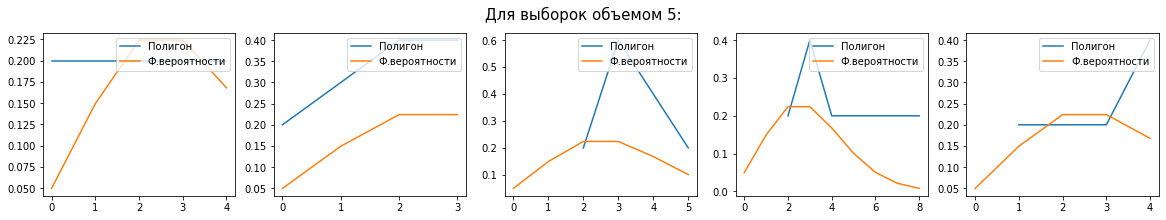

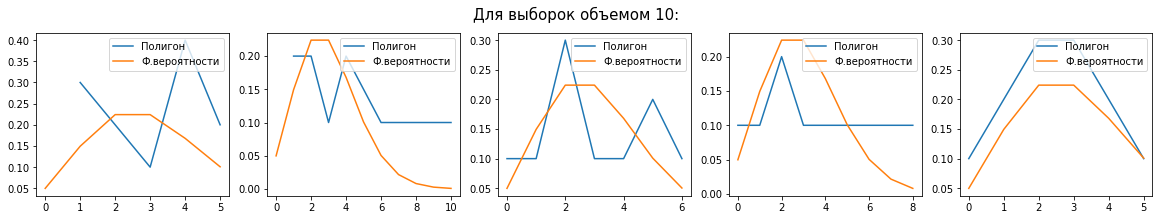

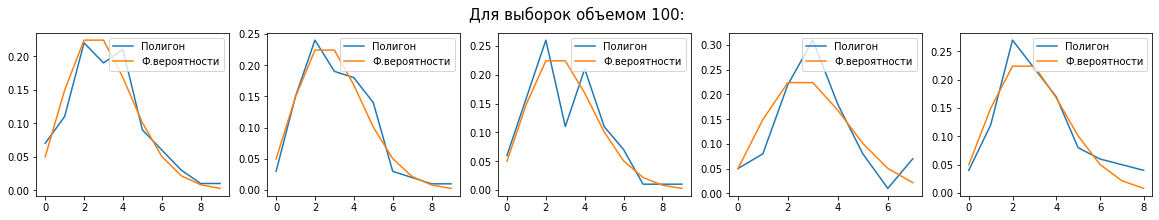

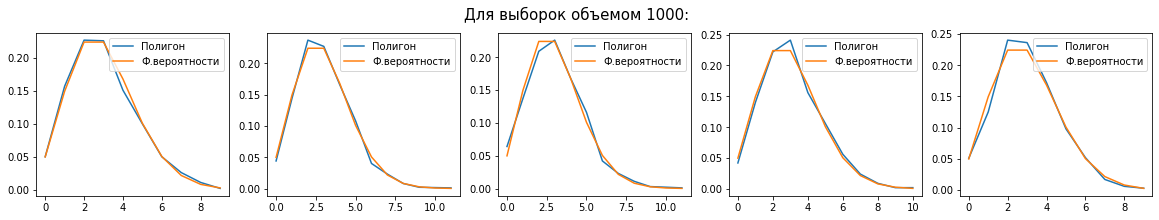

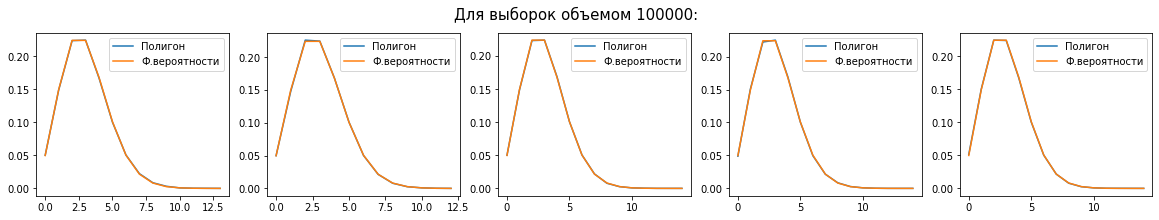

In [143]:
%%time
freq_polygons(var_list_5)
freq_polygons(var_list_10)
freq_polygons(var_list_100)
freq_polygons(var_list_1000)
freq_polygons(var_list_105)

---
---
---
# 2. Распределение Рэлея

---
## 2.1 Моделирование выбранных случайных величин

In [41]:
def inv_f_Rayl(sigma, u):
    return sigma * math.sqrt(-2 * math.log(u))

# Функция генерации выборки
def rand_Rayl(sigma, n):
    nums = []
    for i in range(n):
        u = random.uniform(0, 1)
        nums.append(inv_f_Rayl(sigma, u))
    return nums

# Функция плотности распределения
def f_Rayl(x, sigma):
    return np.exp(-(x ** 2) / (2 * sigma ** 2)) * (x / (sigma ** 2))

# Функция распределения
def F_Rayl(x, sigma):
    return 1 - np.exp(-(x ** 2) / (2 * sigma ** 2))

# Функция генерации выборки
def rand_Rayl(sigma, n):
    nums = []
    for i in range(n):
        u = random.uniform(0, 1)
        nums.append(inv_f_Rayl(sigma, u))
    return nums

#### Пусть $\sigma=3$:

In [42]:
sigma = 3

rayl5 = [] # Выборки объемом 5
for i in range(5):
    rayl5.append(rand_Rayl(sigma, 5))
    
rayl10 = [] # Выборки объемом 10
for i in range(5):
    rayl10.append(rand_Rayl(sigma, 10))
    
rayl100 = [] # Выборки объемом 100
for i in range(5):
    rayl100.append(rand_Rayl(sigma, 100))
    
rayl1000 = [] # Выборки объемом 1000
for i in range(5):
    rayl1000.append(rand_Rayl(sigma, 1000))

rayl105 = [] # Выборки объемом 10 ** 5
for i in range(5):
    rayl105.append(rand_Rayl(sigma, 10 ** 5))
    
print('Выборки объемом 5:', *rayl5, sep='\n')
print()
print('Выборки объемом 10:', *rayl10, sep='\n')

Выборки объемом 5:
[7.270382126442455, 4.530120236474509, 0.24845316633400327, 4.058073947557651, 2.083120389314301]
[3.7788520191656083, 4.390752845967386, 2.506453618312868, 1.504294657770612, 4.274991629670987]
[5.400164909671332, 6.263539380413299, 1.4717747101150969, 3.9173106709234675, 5.43135466067228]
[4.87673222423059, 3.735740546297512, 2.6823153549864083, 1.7177865096773246, 2.4159859489961644]
[5.301844478711003, 4.383758090486168, 5.345552490510814, 5.154981556614537, 5.625286139416536]

Выборки объемом 10:
[4.063998147746627, 2.9496071093198886, 2.1426612144838395, 3.074943414517392, 3.8660124986407407, 5.67833951194318, 1.8627488827478036, 3.8604177375073507, 4.985473099014127, 4.192994222184571]
[5.118326109393722, 2.5031153581407133, 2.730082930464119, 2.4555807092359485, 5.179191513551747, 4.401103489922239, 2.2316634775931212, 2.317472454577401, 9.763151942298496, 2.0540063088893463]
[4.724893604681974, 4.7358211581369005, 3.987047858041147, 4.400705175609269, 4.5169

---
## 2.2. Построение эмпирической функции распределения


<a href="https://www.codecogs.com/eqnedit.php?latex=\dpi{300}&space;\bg_white&space;\tiny&space;\stackrel{\wedge}{F_n}(x)&space;=&space;\dfrac{\sum\limits_{i=1}^{n}I(x_i&space;<&space;x)}{n}" target="_blank"><img src="https://latex.codecogs.com/png.latex?\dpi{300}&space;\bg_white&space;\tiny&space;\stackrel{\wedge}{F_n}(x)&space;=&space;\dfrac{\sum\limits_{i=1}^{n}I(x_i&space;<&space;x)}{n}" title="\tiny \stackrel{\wedge}{F_n}(x) = \dfrac{\sum\limits_{i=1}^{n}I(x_i < x)}{n}" /></a>

Функции для дискретной и для непрерывной величины будут различаться лишь тем, что в первом случае x будут только целыми.

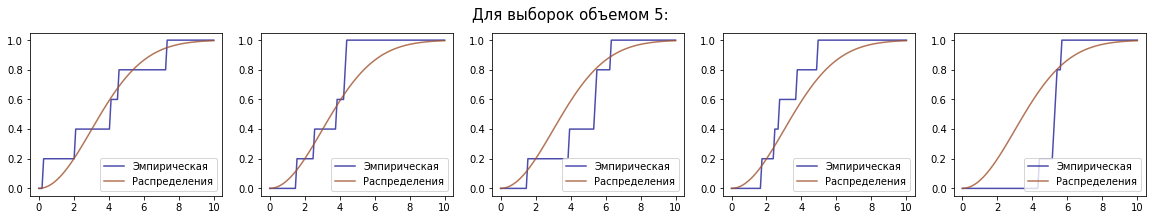

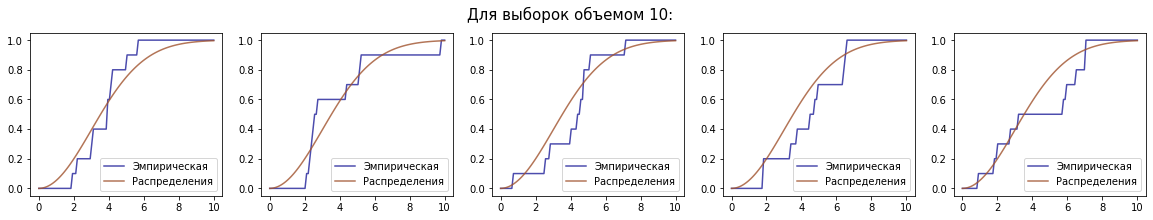

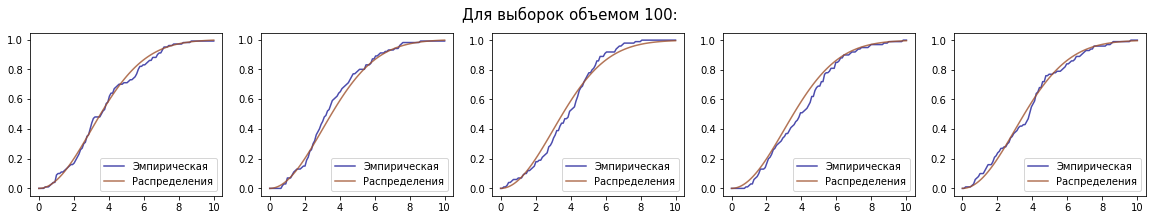

In [43]:
# Эмпирическая функция аналогична объявленной в начале документа

def plots_rayl(rayl):
    plt.figure(figsize=(20, 3))
    plt.suptitle('Для выборок объемом ' + str(len(rayl[1])) + ':', fontsize=15, y=1.)
    cnt = 151
    for r in rayl:
        xx, yy = emp(r, False)
        y_f = list(map(lambda i: F_Rayl(i, 3), xx))
        plt.subplot(cnt)
        plt.plot(xx, yy, alpha = 0.7, color = 'DarkBlue', label = 'Эмпирическая')
        plt.plot(xx, y_f, alpha = 0.8, color = 'Sienna', label = 'Распределения')
        plt.legend(loc="lower right")
        cnt += 1
    
plots_rayl(rayl5)
plots_rayl(rayl10)
plots_rayl(rayl100)

Таким образом, очевидно, что чем больше объем выборки, тем точнее приближение эмпирической функции к функции распределения. Для наглядности представим график для выборки объемом 1000:

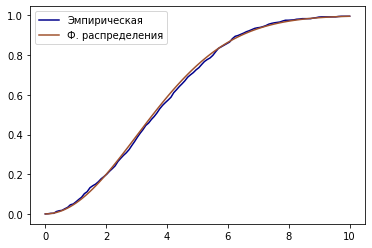

In [70]:
xx, yy = emp(rayl1000[0], False)
_, ax = plt.subplots()
y_f = list(map(lambda i: F_Rayl(i, 3), xx))
ax.plot(xx, yy, color = 'DarkBlue', label = 'Эмпирическая')
ax.plot(xx, y_f, color = 'Sienna', label = 'Ф. распределения')
ax.legend(loc="upper left")

#### Нахождение точной верхней границы разности каждой пары эмпирических функций распределения.

Берутся два набора x и y, по одному для каждой эмпирической функции для выборке в паре. Точки x, согласно алгоритму нахождения эмпирической функции распределения, для них совпадают. Для каждого x ищутся соответствующие y в каждом из наборов, берется модуль разности для них. Последним шагом ищется максимум этих модулей.

##### 1. Для выборок объемом n = 5

In [111]:
combs5 = list(itertools.combinations(rayl5, 2))
print(high_of_diff(combs5, False))

[0.4 0.4 0.4 0.6 0.6 0.4 0.8 0.6 0.4 0.8]


##### 2. Для выборок объемом n = 10

In [112]:
combs10 = list(itertools.combinations(rayl10, 2))
print(high_of_diff(combs10, False))

[0.4 0.4 0.4 0.5 0.4 0.4 0.4 0.2 0.4 0.3]


##### 3. Для выборок объемом n = 100

In [73]:
combs100 = list(itertools.combinations(rayl100, 2))
print(high_of_diff(combs100, False))

[0.1  0.08 0.1  0.08 0.1  0.14 0.09 0.1  0.08 0.09]


##### 4. Для выборок объемом n = 1000

In [74]:
combs1000 = list(itertools.combinations(rayl1000, 2))
print(high_of_diff(combs1000, False))

[0.028 0.051 0.031 0.045 0.05  0.041 0.047 0.042 0.028 0.039]


##### 5. Для выборок объемом n = 10 ** 5

In [109]:
combs105 = list(itertools.combinations(rayl105, 2))
print(high_of_diff(combs105, False))

[0.00519 0.00363 0.00476 0.00543 0.00309 0.00491 0.00296 0.00668 0.0048
 0.00438]


##### 6. Для комбинаций выборок n = 5 и n = 10 (без учета сочетаний выборок одинакового объема)

In [97]:
combs5_10 = list(itertools.product(rayl5, rayl10))
print(high_of_diff(combs5_10, False))

[0.3 0.3 0.3 0.3 0.3 0.2 0.3 0.5 0.6 0.5 0.5 0.5 0.5 0.3 0.3 0.4 0.3 0.5
 0.4 0.5 0.8 0.6 0.7 0.5 0.5]


##### 7. Для комбинаций выборок n = 5 и n = 100 (без учета сочетаний выборок одинакового объема)

In [98]:
combs5_100 = list(itertools.product(rayl5, rayl100))
print(high_of_diff(combs5_100, False))

[0.22 0.25 0.22 0.2  0.19 0.32 0.3  0.38 0.44 0.32 0.37 0.42 0.41 0.37
 0.38 0.29 0.22 0.33 0.34 0.33 0.67 0.69 0.59 0.54 0.65]


##### 8. Для комбинаций выборок n = 5 и n = 1000 (без учета сочетаний выборок одинакового объема)

In [99]:
combs5_1000 = list(itertools.product(rayl5, rayl1000))
print(high_of_diff(combs5_1000, False))

[0.198 0.213 0.199 0.198 0.212 0.341 0.332 0.345 0.352 0.319 0.379 0.388
 0.38  0.382 0.418 0.266 0.257 0.271 0.275 0.245 0.643 0.651 0.64  0.628
 0.661]


##### 9. Для комбинаций выборок n = 5 и n = 10 ** 5 (без учета сочетаний выборок одинакового объема)

In [100]:
combs5_105 = list(itertools.product(rayl5, rayl105))
print(high_of_diff(combs5_105, False))

[0.1993  0.19575 0.1957  0.19624 0.19573 0.3391  0.34131 0.34033 0.33976
 0.34262 0.39501 0.38982 0.39235 0.3928  0.39075 0.25443 0.25731 0.25552
 0.25881 0.25826 0.64613 0.64293 0.64343 0.64433 0.64176]


##### 10. Для комбинаций выборок n = 10 и n = 100 (без учета сочетаний выборок одинакового объема)

In [101]:
combs10_100 = list(itertools.product(rayl10, rayl100))
print(high_of_diff(combs10_100, False))

[0.2  0.23 0.25 0.27 0.21 0.25 0.22 0.32 0.29 0.26 0.28 0.34 0.22 0.21
 0.25 0.28 0.32 0.22 0.19 0.28 0.3  0.33 0.39 0.31 0.3 ]


##### 11. Для комбинаций выборок n = 10 и n = 1000 (без учета сочетаний выборок одинакового объема)

In [102]:
combs10_1000 = list(itertools.product(rayl10, rayl1000))
print(high_of_diff(combs10_1000, False))

[0.188 0.204 0.172 0.19  0.187 0.246 0.241 0.261 0.256 0.245 0.277 0.306
 0.274 0.268 0.295 0.259 0.296 0.255 0.25  0.281 0.322 0.323 0.334 0.33
 0.352]


##### 12. Для комбинаций выборок n = 10 и n = 10 ** 5 (без учета сочетаний выборок одинакового объема)

In [103]:
combs10_105 = list(itertools.product(rayl10, rayl105))
print(high_of_diff(combs10_105, False))

[0.18251 0.18072 0.18267 0.17864 0.17916 0.25443 0.25583 0.25442 0.25881
 0.25824 0.28223 0.27815 0.27885 0.27917 0.27764 0.2609  0.25869 0.25967
 0.26024 0.25738 0.33606 0.33195 0.33339 0.33417 0.33359]


##### 13. Для комбинаций выборок n = 100 и n = 1000 (без учета сочетаний выборок одинакового объема)

In [106]:
combs100_1000 = list(itertools.product(rayl100, rayl1000))
print(high_of_diff(combs100_1000, False))

[0.054 0.057 0.069 0.056 0.088 0.078 0.061 0.089 0.091 0.081 0.102 0.108
 0.085 0.086 0.094 0.103 0.112 0.1   0.088 0.121 0.082 0.112 0.071 0.072
 0.089]


##### 14. Для комбинаций выборок n = 100 и n = 10 ** 5 (без учета сочетаний выборок одинакового объема)

In [107]:
combs100_105 = list(itertools.product(rayl100, rayl105))
print(high_of_diff(combs100_105, False))

[0.06604 0.06215 0.06347 0.06469 0.06355 0.07848 0.08023 0.07908 0.08095
 0.08319 0.08771 0.08599 0.08777 0.08295 0.08389 0.10613 0.10293 0.10343
 0.10433 0.10176 0.08152 0.07977 0.08092 0.07905 0.07681]


##### 15. Для комбинаций выборок n = 1000 и n = 10 ** 5 (без учета сочетаний выборок одинакового объема)

In [108]:
combs1000_105 = list(itertools.product(rayl1000, rayl105))
print(high_of_diff(combs1000_105, False))

[0.02267 0.0247  0.02161 0.0269  0.02549 0.04068 0.04315 0.04088 0.04355
 0.04517 0.02498 0.0238  0.02556 0.02216 0.0224  0.02194 0.02172 0.01967
 0.02557 0.02309 0.02299 0.02818 0.02565 0.0252  0.02725]


---
## 2.3 Построение вариационного ряда выборки

In [76]:
var_list_5_R = []
for i in rayl5:
    var_list_5_R.append(sorted(i))
print('Вариационные ряды для выборок объема 5:', *var_list_5_R, sep='\n')
print()

var_list_10_R = []
for i in rayl10:
    var_list_10_R.append(sorted(i))
print('Вариационные ряды для выборок объема 10:', *var_list_10_R, sep='\n')

var_list_100_R = []
for i in rayl100:
    var_list_100_R.append(sorted(i))
    
var_list_1000_R = []
for i in rayl1000:
    var_list_1000_R.append(sorted(i))
    
var_list_105_R = []
for i in rayl105:
    var_list_105_R.append(sorted(i))

Вариационные ряды для выборок объема 5:
[1.978876077959781, 2.5063327221196756, 3.9129663730934054, 4.846721918678741, 7.723719953450479]
[1.6800824734908923, 5.149994191612197, 5.596364317499411, 7.596833899163187, 8.299179225569748]
[1.6242330640981661, 3.035639537749649, 3.958224788094049, 5.4867080909101364, 9.328014527611705]
[2.111565335001899, 2.3049950074025474, 3.811744099616063, 4.480729713830012, 5.504215094865172]
[2.120864262654759, 2.3619428778769755, 2.7554974376381587, 3.0799574992243457, 5.540529948278621]

Вариационные ряды для выборок объема 10:
[0.6161357396178874, 1.7998710871197956, 2.8966926736757226, 3.5647870963252677, 3.6811279250421265, 4.4262862873429505, 4.521883346559514, 5.027137116834488, 5.114306798582081, 6.557225651954404]
[0.39795420038569507, 2.205768465647905, 2.3677646792412177, 2.6226805687625014, 3.225341486394149, 3.2727063944706094, 3.5558960235310053, 4.296679607192729, 6.346673229999161, 6.364127312760802]
[1.270461574691029, 1.8976461156062

#### Найти выборочную квантиль уровня 0.1, 0.5, 0.7

Из функции нахождения эмпирической функции распределения получаем список x и y. Если искомая квантиль находится в списке y, то необходимо найти соответствующую ей x. В противном случае находится промежуток, в котором находится квантиль, и найти среднее в нем.

В случае, если квантиль меньше самого малого из y, возвращается 0.

В случае, если квантиль больше самого большого из у, возвращается x, соответствующее максимальному у.

In [77]:
kv = [0.1, 0.5, 0.7] 

print_quants(kv, rayl5, 5, False)
print()
print_quants(kv, rayl10, 10, False)
print()
print_quants(kv, rayl100, 100, False)
print()
print_quants(kv, rayl1000, 1000, False)
print()
print_quants(kv, pois105, 10 ** 5, False)

Выборки объемом 5:
                    Представленная функция                      Из пакета scipy
0.1    [1.972, 1.697, 1.606, 2.156, 2.156]   [1.979, 1.68, 1.624, 2.112, 2.121]
0.5    [3.899, 5.642, 3.991, 3.807, 2.798]  [3.913, 5.596, 3.958, 3.812, 2.755]
0.7     [4.817, 7.569, 5.459, 4.45, 3.073]   [4.962, 7.625, 5.64, 4.522, 3.178]

Выборки объемом 10:
                    Представленная функция                      Из пакета scipy
0.1    [0.642, 0.459, 1.284, 0.734, 0.183]  [1.113, 1.157, 1.534, 0.869, 0.971]
0.5    [3.761, 3.257, 3.165, 3.486, 2.936]  [4.054, 3.249, 3.162, 3.532, 3.005]
0.7    [4.587, 3.578, 3.761, 4.037, 3.853]  [4.795, 3.956, 4.043, 4.238, 3.858]

Выборки объемом 100:
                    Представленная функция                      Из пакета scipy
0.1     [1.009, 1.376, 1.284, 1.376, 1.33]  [1.095, 1.394, 1.287, 1.379, 1.346]
0.5     [3.349, 3.44, 3.257, 3.119, 3.394]  [3.392, 3.428, 3.238, 3.112, 3.426]
0.7    [4.541, 4.495, 4.633, 4.771, 4.587]   [4.57, 4.479,

---
## 1.4 Построение гистограммы частот

Возьмем отрезок, в который точно попадает вся выборка, и разобьем на N частей. Поставим каждому отрезку в соответствие частное от деления числа чисел из выборки, входящих в отрезок, на объем выборки. По этим данным строится гистограмма.

Wall time: 1 s


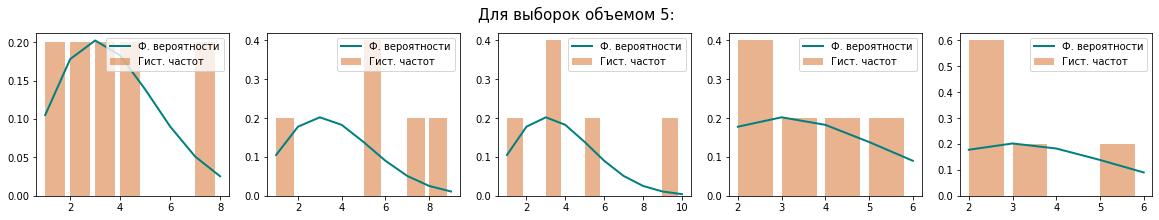

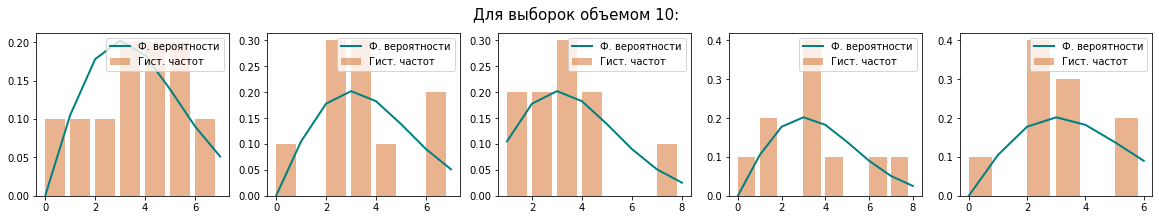

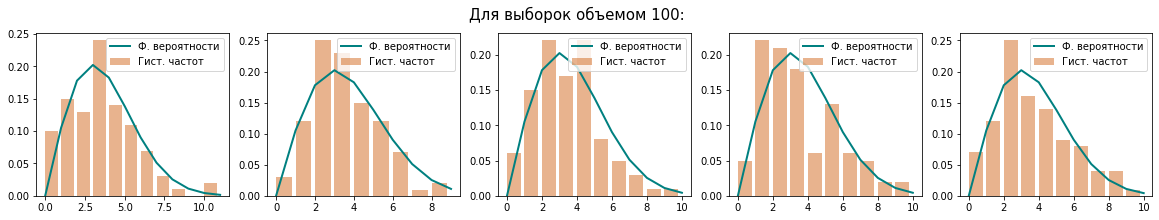

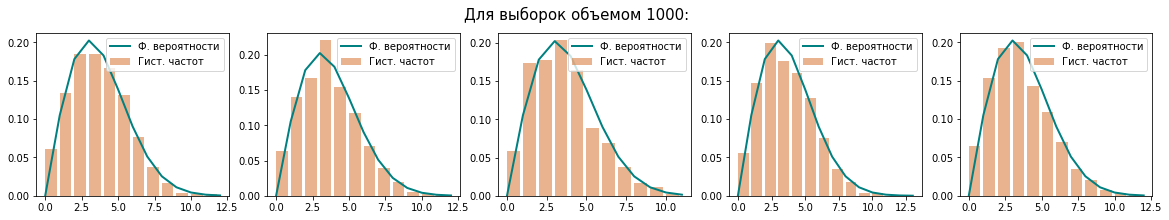

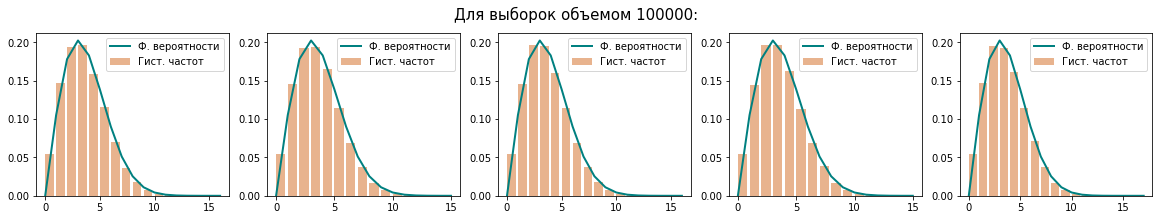

In [144]:
%%time

def freq_hists(var_list, n):
    plt.figure(figsize=(20, 3))
    plt.suptitle('Для выборок объемом ' + str(n) + ':', fontsize=15, y=1.)
    cnt = 151
    for v in var_list:
        vv = list(map(lambda x: int(x), v))
        maximum = max(vv)
        minimum = min(vv)
        xx = list(range(minimum, maximum + 1))
        yy = []
        x_1 = list(range(minimum, maximum + 2))
        y_1 = list(map(lambda x: f_Rayl(x, 3), x_1))
       
        for x in xx:
            yy.append(vv.count(x) / n)
#         print(t2-t1)
        plt.subplot(cnt)
        plt.bar(xx, yy, align='edge', alpha=0.5, color='chocolate', label='Гист. частот')
        plt.plot(x_1, y_1, color='teal', lw=2, label='Ф. вероятности')
        plt.legend(loc="upper right")
        cnt += 1
        
freq_hists(var_list_5_R, 5)
freq_hists(var_list_10_R, 10)
freq_hists(var_list_100_R, 100)
freq_hists(var_list_1000_R, 1000)
freq_hists(var_list_105_R, 10 ** 5)